In [1372]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [1373]:
movie=pd.read_csv('/Users/diwu/Desktop/Group Project/compare2.csv')

In [1374]:
len(movie)

3956

In [1375]:
del movie['Unnamed: 0']
#del movie['Theaters']
#del movie['Country']
#del movie['Genre']
#del movie['Rated']
#del movie['Runtime']
#del movie['Language']
#del movie['imdbRating']
#del movie['Actorinfluenceaverage']
#del movie['if_actorinfluence']
#del movie['Average Gross for each movie']
#del movie['if_average_gross']
#del movie['googletrends']
#del movie['last year_totalgross']
#del movie['genre_gross']
#del movie['count_num']

In [1376]:
moviedata=movie.values

In [1377]:
moviedata

array([[ 1.56838146, -0.70717154,  0.21893763, ..., -0.61584295,
        -0.02585257,  0.00269417],
       [-0.48949666,  1.76943133, -0.16027308, ..., -0.61584295,
         0.7965872 , -0.13158078],
       [-0.58710672, -0.70717154, -0.16027308, ..., -0.61584295,
        -1.02337756, -0.15176598],
       ..., 
       [-0.54596529,  0.77879018, -0.5394838 , ..., -0.61584295,
         1.12141635, -0.15191901],
       [-0.59033349, -0.70717154,  1.73578049, ..., -0.61584295,
         0.44641676, -0.1529352 ],
       [-0.56613265, -0.70717154, -0.5394838 , ..., -0.61584295,
        -0.75153472, -0.14981852]])

In [1378]:
target=moviedata[:,-1]

In [1379]:
factors=moviedata[:,0:-1]

In [1380]:
factors[0,:]

array([ 1.56838146, -0.70717154,  0.21893763,  0.51167937, -0.08087925,
       -0.28930503, -0.16479519,  1.11698863,  1.2107698 , -0.38704236,
       -0.61584295, -0.02585257])

In [1381]:
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(factors, target, test_size=0.2,random_state=0)

# #############################################################################
# Fit regression model
regr =linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [ 0.17975106 -0.00132479  0.00254312 -0.00368609  0.03511499 -0.0076661
  0.0485081   0.08697491 -0.05767141  0.32529579 -0.13574767  0.00045019]
Mean squared error: 0.05
Variance score: 0.61


In [1382]:
diabetes_X_train

array([[-0.59194688,  1.76943133, -0.16027308, ..., -0.38704236,
        -0.61584295,  1.4462455 ],
       [-0.07808238, -0.70717154, -0.5394838 , ..., -0.38704236,
        -0.61584295, -0.50272941],
       [ 0.32445827, -0.70717154,  0.21893763, ..., -0.38704236,
        -0.61584295,  1.66510203],
       ..., 
       [ 1.52078647, -0.70717154, -0.5394838 , ...,  0.57846257,
         1.62338014, -0.05810511],
       [ 2.65580588,  1.76943133,  1.35656977, ...,  2.67133649,
         1.62338014,  0.81732097],
       [ 2.7735833 , -0.70717154,  0.21893763, ...,  6.40272907,
         1.62338014, -1.50486191]])

In [1383]:
from sklearn.neural_network import MLPRegressor

In [1384]:
mlp = MLPRegressor(hidden_layer_sizes=(200,200,200),max_iter=1000000000000000000,tol=0.000001)

In [1385]:
mlp.fit(diabetes_X_train, diabetes_y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(200, 200, 200), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000000000000000000,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=1e-06,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [1386]:
diabetes_y_pred_nerual=mlp.predict(diabetes_X_test)
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred_nerual))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Mean squared error: 0.04
Variance score: 0.61


In [1387]:
diabetes_X_test[-1]

array([ 1.99431624,  1.76943133,  0.21893763,  0.51167937, -0.25617486,
       -0.28930503, -0.55388257,  0.39907359,  1.2107698 ,  0.65797474,
        1.62338014,  0.41416422])

In [1388]:
svr_rbf = SVR(kernel='rbf', C=3, gamma=0.085)

In [1389]:
y_rbf = svr_rbf.fit(diabetes_X_train, diabetes_y_train)

In [1390]:
diabetes_y_pred_rbf=y_rbf.predict(diabetes_X_test)
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred_rbf))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred_rbf))

Mean squared error: 0.02
Variance score: 0.83


In [1391]:
diabetes_y_pred_rbf_total=y_rbf.predict(factors)

In [1392]:
len(factors)

3956

In [1393]:
for j in range(len(diabetes_y_pred_rbf_total)):
    if (abs(diabetes_y_pred_rbf_total[j]-target[j])) < 0.0005:
        print(j)
        print(diabetes_y_pred_rbf_total[j])
        print(target[j])

378
-0.152464706972
-0.152894773668
1044
-0.151865817406
-0.151728948967
1052
-0.152815852168
-0.15236783657
1257
-0.151762091621
-0.152190413999
1324
-0.0196113551111
-0.0198562372222
1419
-0.0770506735921
-0.0773153138981
1723
-0.152673312364
-0.152646404751
2482
-0.148317856711
-0.148505861726
2722
-0.152335456951
-0.152520065363
2745
-0.152545133468
-0.152798724279
2756
-0.153153259697
-0.152755557628
2938
-0.152370608191
-0.152795435175
3006
-0.145408306688
-0.145218701233
3082
-0.152493761829
-0.152977946406


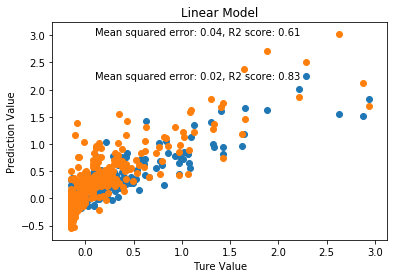

In [1394]:
plt.scatter(diabetes_y_test, diabetes_y_pred)
plt.xlabel('Ture Value')
plt.ylabel('Prediction Value')
plt.title('Linear Model')
plt.text(0.1, 3, r'Mean squared error: 0.04, R2 score: 0.61')
plt.show()

In [1395]:
plt.scatter(diabetes_y_test, diabetes_y_pred_rbf)
plt.xlabel('Ture Value')
plt.ylabel('Prediction Value')
plt.title('SVR Model with RBF Kernel')
plt.text(0.1, 2.2, r'Mean squared error: 0.02, R2 score: 0.83')
plt.savefig("SVR Model")

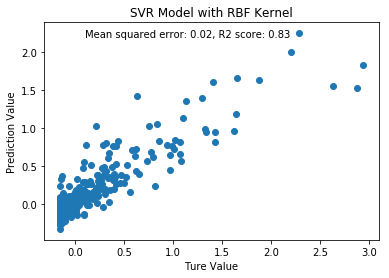

In [1396]:
plt.show()

In [1397]:
movietest=pd.read_csv('/Users/diwu/Desktop/Group Project/testmovie_normalized.csv')

In [1398]:
movietest

,Unnamed: 0,Theaters,Country,Genre,Rated,Runtime,Open,imdbRating,Actorinfluenceaverage,if_actorinfluence,googletrends,Average Gross for each movie,if_average_gross,Total_gross
0,0,2.819565,-0.707172,4.011045,0.511679,2.154140,-0.289305,1.002467,4.420049,1.210770,-0.370970,1.623380,369.860099,4.177207
1,1,2.751803,-0.707172,1.735780,0.511679,1.452957,-0.289305,1.099739,-0.696520,-0.825712,-0.353931,1.623380,458.324209,4.177207
2,2,2.101607,-0.707172,5.148677,0.511679,0.138240,-0.289305,1.488826,1.210323,1.210770,-0.387042,-0.615843,-1.504862,0.428262
3,3,2.819565,-0.707172,1.356570,0.511679,0.313536,-0.289305,2.169729,0.070233,1.210770,-0.348678,1.623380,700.448634,1.298176
4,4,-0.591947,-0.707172,-0.160273,-1.953855,0.094416,-0.289305,1.099739,-0.696520,-0.825712,-0.387042,-0.615843,-1.504862,-0.152692
5,5,-0.567746,1.769431,0.218938,-1.953855,0.182064,8.535504,-0.748426,-0.696520,-0.825712,-0.387042,-0.615843,-1.504862,-0.152076
6,6,-0.592754,-0.707172,5.527888,0.511679,0.401184,-0.289305,-0.164795,-0.696520,-0.825712,-0.387042,-0.615843,-1.504862,-0.152945


In [1399]:
#del movietest['Unnamed: 0']
#del movie['Theaters']
del movietest['Country']
#del movie['Genre']
del movietest['Rated']
del movietest['Runtime']
del movietest['Open']
del movietest['imdbRating']
del movietest['Actorinfluenceaverage']
del movietest['if_actorinfluence']
#del movie['Average Gross for each movie']
del movietest['if_average_gross']
del movietest['googletrends']

In [1400]:
movietestarray=movietest.values

In [1401]:
factors_test=movietestarray[:,0:-1]
factors_test

array([[ 0.        ,  2.8195649 ,  4.01104477,  1.62338014],
       [ 1.        ,  2.75180254,  1.73578049,  1.62338014],
       [ 2.        ,  2.10160664,  5.14867691, -0.61584295],
       [ 3.        ,  2.8195649 ,  1.35656977,  1.62338014],
       [ 4.        , -0.59194688, -0.16027308, -0.61584295],
       [ 5.        , -0.56774604,  0.21893763, -0.61584295],
       [ 6.        , -0.59275358,  5.52788763, -0.61584295]])